In [48]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

# Season One (Basics)

## Setting up IBM Token

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.save_account('0c83235dfdb38f43eb41f2e7c2962cc95af284fe46d1434151cd439eab3f5ce9d53a6805cede3054a985a10e43874de7f4dff0a9eb3b7388150d290c0ebe9bda')

/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_14421/4190701262.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('0c83235dfdb38f43eb41f2e7c2962cc95af284fe46d1434151cd439eab3f5ce9d53a6805cede3054a985a10e43874de7f4dff0a9eb3b7388150d290c0ebe9bda')
/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_14421/4190701262.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with '

In [2]:
IBMQ.load_account()

/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_27552/485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_27552/485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Hello World

In [17]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
quantum_ckt = QuantumCircuit(qr, cr)

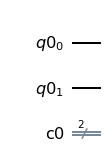

In [18]:
quantum_ckt.draw('mpl')

In [19]:
# create bell state
quantum_ckt.h(qr[0])
quantum_ckt.cnot(qr[0], qr[1])

In [20]:
quantum_ckt.measure(qr, cr)

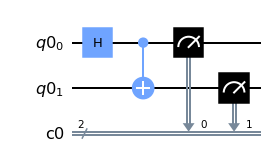

In [21]:
quantum_ckt.draw('mpl')

In [24]:
simulator = Aer.get_backend('qasm_simulator')

In [25]:
results = execute(quantum_ckt, backend=simulator).result()

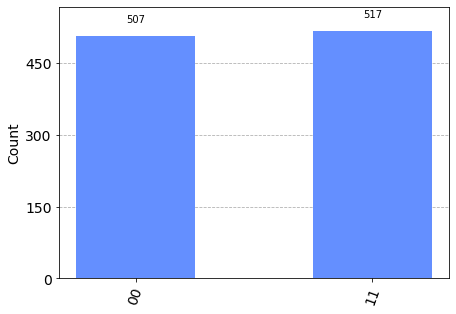

In [28]:
plot_histogram(results.get_counts(quantum_ckt))

In [5]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-03-25 16:19:16,811: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider('ibm-q')

In [8]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [11]:
qcomp = provider.get_backend('ibm_osaka')

In [29]:
job = execute(quantum_ckt, backend=qcomp)

Basically the job was sent to a literal quantum computer so it gets shoved into an actual queue

In [30]:
from qiskit.tools.monitor import job_monitor

In [43]:
job_monitor(job)

Job Status: job has successfully run


In [44]:
result = job.result()

The simulator simulates a perfect quantum computer, but the actual quantum computer has some associated noise so there are occasional unexpected values. For example, the $$|01>$$ state shouldn't be measurable here but it is because of hardware errors

UPDATE: this job is successfully get submitted and run! It is possible to check on the IBM account!

## Building blocks of Quantum Circuits

In [3]:
from qiskit.tools.visualization import plot_bloch_multivector

It seems that the simulator used actually affects what capabilities the backend actually has..?

In [4]:
ckt = QuantumCircuit(1)
ckt.x(0)
simulator = Aer.get_backend('aer_simulator_statevector')

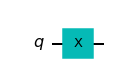

In [5]:
ckt.draw('mpl')

In [87]:
ckt.save_statevector()
#result = simulator.run(transpile(ckt, simulator)).result()
result = execute(ckt, backend=simulator).result()

statevector = result.get_statevector(ckt)

In [88]:
statevector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


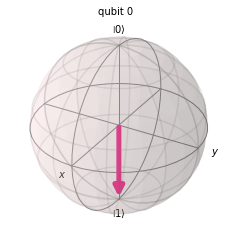

In [89]:
plot_bloch_multivector(statevector)

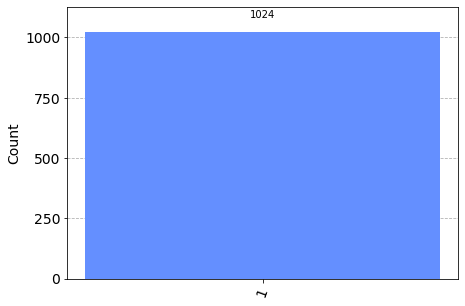

In [91]:
ckt.measure(0, 0)
backend = Aer.get_backend('qasm_simulator')
result = execute(ckt, backend = backend, shots = 1024).result()
plot_histogram(result.get_counts())

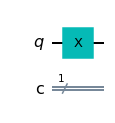

In [107]:
ckt.draw('mpl')

In [8]:
ckt.save_unitary()
backend = Aer.get_backend('aer_simulator_unitary')
result = execute(ckt, backend = backend).result()
#unitary = result.get_unitary()

In [9]:
result.get_unitary(ckt)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

## Quantum Teleportation

In [16]:
# initialize the first qubit to be in state |1>
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.barrier()

# creating bell state
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# teleportation protocol
qc.cx(0,1)
qc.h(0)
qc.measure([0,1], [0,1])
qc.barrier()

# now based on the measured outcomes we can teleport qubit 0 to qubit 2
qc.cx(1,2)
qc.cz(0,2)
qc.measure(2, 2)

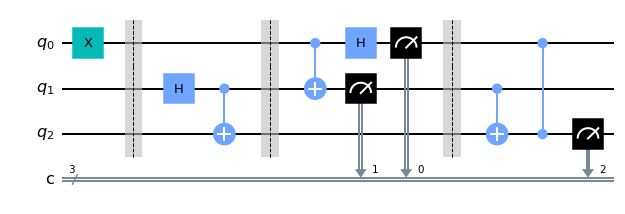

In [17]:
qc.draw('mpl')

Could I have achieved this by creating the bell state separately? Kind of.. I didn't find a much better way than this

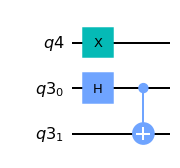

In [14]:
bell = QuantumRegister(2)
one = QuantumRegister(1)

qc = QuantumCircuit(one, bell)
qc.x(one[0])
qc.h(bell[0])
qc.cx(bell[0], bell[1])

qc.draw('mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts()

Qubit order is read "upwards" the same as circuit going upwards

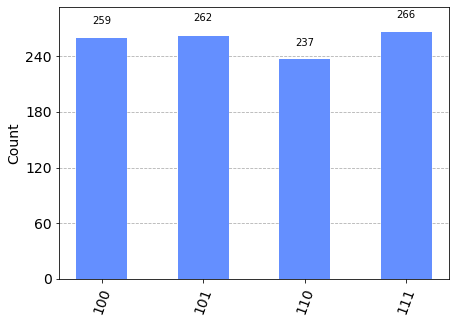

In [19]:
plot_histogram(counts)

What happens if you get results without measurement?

In [35]:
# initialize the first qubit to be in state |1>
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.barrier()

# creating bell state
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# teleportation protocol
qc.cx(0,1)
qc.h(0)
qc.barrier()

# now based on the measured outcomes we can teleport qubit 0 to qubit 2
# the classical info transport is equivalent to just using control gates
qc.cx(1,2)
qc.cz(0,2)

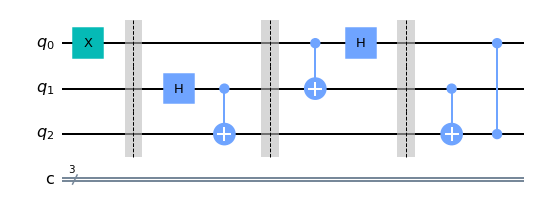

In [36]:
qc.draw('mpl')

Ah ok, you get an error. So I guess you cannot do that

In [37]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts()

QiskitError: 'No counts for experiment "0"'

## Bernstein Vazirani Algorithm

The situation is that the quantum computer has to guess a "secret sting". The secret string is a parameter for an UNKNOWN FUNCTION that XORs an input on the indices of the "secret string"

In [ ]:
# 101001 - pretend this is the secret number

In [40]:
# Here are are simply preparing our input with the uniform state and a minus ancilla


qc = QuantumCircuit(6 + 1, 6) # you have 1 extra qubit for a secret string of length n
qc.h([0,1,2,3,4,5])
qc.x(6)
qc.h(6)
qc.barrier()

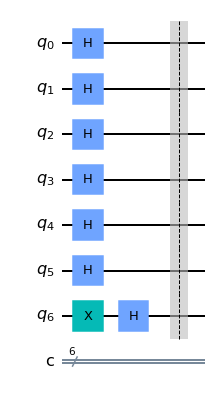

In [41]:
qc.draw('mpl')

In [42]:
# Here are are implementing the UNKNOWN XOR FUNCTION
# In general you would not know this function and could only read the outputs

# cx on each of 101001 to the ancilla qubit makes this XOR function. Note that the bits are read in reverse
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(0, 6)
qc.barrier()

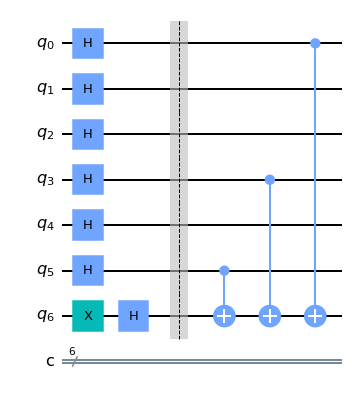

In [43]:
qc.draw('mpl')

In [44]:
qc.h([0,1,2,3,4,5])
qc.measure([0,1,2,3,4,5], [0,1,2,3,4,5])

In [46]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(qc, simulator, shots=1024).result()

And voila, the measurement always returns what the function was!

In [47]:
results.get_counts()

{'101001': 1024}

## Mitigating Noise on Teal Quantum Computers

Ignius was the original component that dealt with noise; it is now deprecated so I don't know exaclty what works with it now.

## Measurement error mitigation

In [50]:
nqubits = 3
ncbits = 3
qc = QuantumCircuit(nqubits, ncbits)
qc.h(0)
qc.cx(0, 1)
qc.cx(1,2)
qc.measure([0,1,2], [0,1,2])

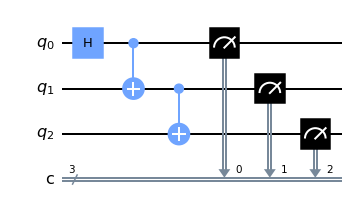

In [51]:
qc.draw('mpl')

Perfect simulator

In [53]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=simulator, shots=1024).result()

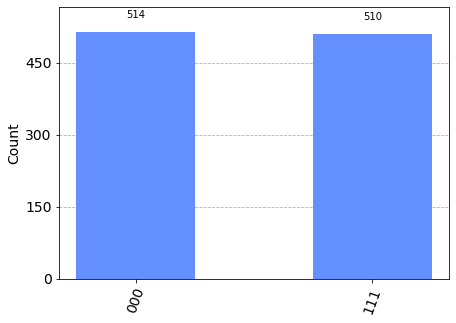

In [54]:
plot_histogram(results.get_counts())

Noise real device

In [55]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibm_osaka')


# seems that in the newer qiskit use "qiskit_ibm_provider.IMBProvider intead of qiskit.IBMQ
# should consider migrating to qiskit-ibm-runtime and qiskit-ibm-provider

/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_60652/1004786031.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_60652/1004786031.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


In [60]:
# This is how you'd send the job over and monitor it

job = execute(qc, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(qc))

From results we can see a small amount of noise, how can we mitigate this?

In [62]:
from qiskit_experiments.library import LocalReadoutError, CorrelatedReadoutError

ModuleNotFoundError: No module named 'qiskit_experiments'

# Season 2 (Algorithms)

## Fourier Checking circuit

Fourier checking is aparently a subroutine used in a lot of algorithms including Shor's algorithm

In [58]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_histogram

In [60]:
f=[1,-1, -1, -1]
g=[1, 1, -1, -1]

Basically the Fourier checking circuit sees if the Fourier Transform of g is correlated with the function f. It does this in a weird way by outputting a probability of |00> and if the probability is greater than 0.05 then we consider them correlated.

In [61]:
ckt = FourierChecking(f, g)
zero = qi.Statevector.from_label('00')
sv = zero.evolve(ckt)

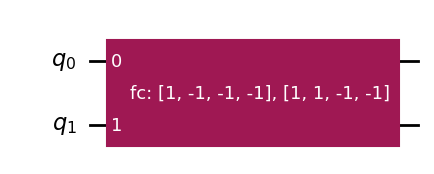

In [66]:
ckt.draw('mpl')

In [68]:
ps = sv.probabilities_dict()

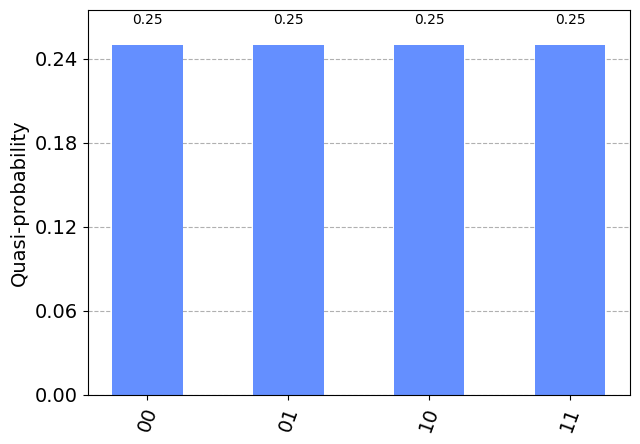

In [69]:
plot_histogram(ps)

## Grover

Grover's algoritm is a search algorithm that identifies the "special string" (when inputted to a mystery function has a characteristic result). For example, if the "mystery" function is CZ, and we're looking for the input that is a negative 1 eigenstate, then |11> is the "special state" and Grover helps us search for this.

Ingredients for Amplitude amplification:
- Oracle
- Reflection

Together these mae the Grover "Diffusion" operation

TODO: Read up a little more on what grover actually does

In [2]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
oracle = QuantumCircuit(2, name='oracle') # what does the name do?
oracle.cz(0,1)
oracle.to_gate() # interesting -- doesn't seem to change the drawing
# If you want to get the circuit back then you can decompose()

In [33]:
from qiskit_aer import AerSimulator, StatevectorSimulator

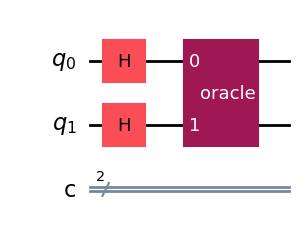

In [34]:
simulator = StatevectorSimulator()
grover_ckt = QuantumCircuit(2, 2)
grover_ckt.h([0,1])
grover_ckt.append(oracle, [0, 1])
grover_ckt.draw('mpl')

The oracle gate is a compound gate that is a little too difficult for the simulator to know as an instruction, but if you decompose it, then it will know the building blocks that make up the gate so it will know how to run it

In [42]:
result = simulator.run(grover_ckt.decompose()).result()

In [45]:
result.get_statevector().draw('latex')

<IPython.core.display.Latex object>

Grover's algorithm has a geometric interpretation where you iteratively reflect across different vectors (the first reflection is across a "hidden" orthogonal vector of the oracle, and the 2nd reflection is across a the original uniform superposition state). Doing this sqrt(N) times will arrive you at the correct "winner" vector

In [46]:
# Refection operator
reflection = QuantumCircuit(2, name='refection')
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='refection', num_qubits=2, num_clbits=0, params=[])

In [48]:
grover = QuantumCircuit(2, 2)
grover.h([0, 1])
grover.append(oracle, [0, 1])
grover.append(reflection, [0, 1])
grover.measure([0,1], [0,1])

In [54]:
simulator = AerSimulator()
result = simulator.run(grover.decompose(), shots = 1024).result()

In [56]:
result.get_counts()

{'11': 1024}

## Grover Application (Satisfiability)

Wasn't able to complete this because the PhaseOracle doesn't work. I asked the Qiskit slack about this

One application of Grover is to finding inputs to functions that output True (a satisfying output)

In [71]:
from qiskit_aer import AerSimulator
from qiskit_algorithms import Grover, AmplificationProblem
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.circuit.library import PhaseOracle

In [72]:
logical_expr = '((John & Pete) | (Jake & Amir)) & ~(Jeff & Jared)'
algorithm = Grover(PhaseOracle(logical_expr))

MissingOptionalLibraryError: "The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."

In [73]:
!pip list

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
comm                      0.2.2
contourpy                 1.2.0
cryptography              42.0.5
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
dill                      0.3.8
executing                 2.0.1
fastjsonschema            2.19.1
fonttools                 4.50.0
fqdn                      1.5.1
h11                       0.14.0
httpcore       

## Quantum Machine Learning

Quantum Support Vector Machine:

Some kernels are diffcult to computer classically.

In [8]:
#import qiskit
import matplotlib.pyplot as plt
from qiskit_machine_learning.datasets import ad_hoc_data # from qiskit-community github
import numpy as np
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer import AerSimulator

In [29]:
# Generates a dataset that can be fully separated
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

# seems that dataset is always twice the size?
# all numpy format

In [30]:
def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

Clearly not linearly separable without a kernel

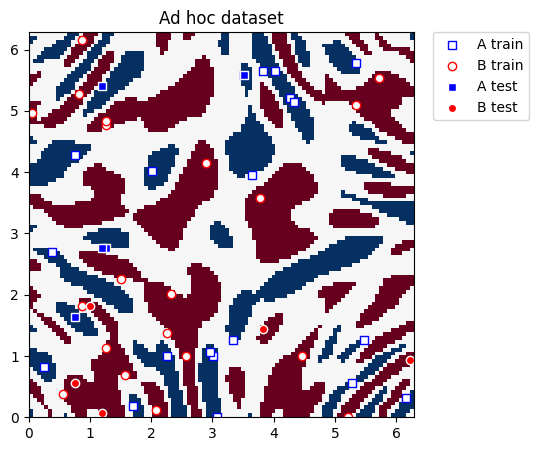

In [31]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

In [34]:
from qiskit.circuit.library import ZZFeatureMap

# The first 2 get passed into the kernel as arguments
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

Hm, there's that callable function trick again...

In [35]:
from sklearn.svm import SVC

# Note that the "evaluate" method is being passed into the adhoc_svc as a callable function
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(train_features, train_labels)
adhoc_score_callable_function = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 1.0


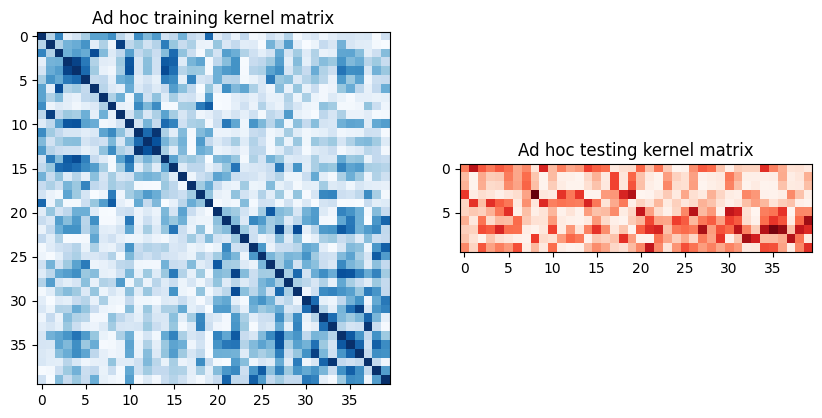

In [36]:
# Here the function is not "callable" but instead the training is pre-computer and then passed into a plotting fxn

adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [37]:
# I guess you have to explicitly tell SVC that you are passing in precomputer matrices
adhoc_svc = SVC(kernel="precomputed")

adhoc_svc.fit(adhoc_matrix_train, train_labels)

adhoc_score_precomputed_kernel = adhoc_svc.score(adhoc_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {adhoc_score_precomputed_kernel}")

Precomputed kernel classification test score: 1.0


The QSVC takes in the quantum kernel without it having to be callable (without precomputing the matrices). It's a little redundant but I think it is just here for convenience

In [38]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 1.0


In [39]:
print(f"Classification Model                    | Accuracy Score")
print(f"---------------------------------------------------------")
print(f"SVC using kernel as a callable function | {adhoc_score_callable_function:10.2f}")
print(f"SVC using precomputed kernel matrix     | {adhoc_score_precomputed_kernel:10.2f}")
print(f"QSVC                                    | {qsvc_score:10.2f}")

Classification Model                    | Accuracy Score
---------------------------------------------------------
SVC using kernel as a callable function |       1.00
SVC using precomputed kernel matrix     |       1.00
QSVC                                    |       1.00


# Circuit Library

In [ ]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

## N-local circuit

An exmaple of an N-local circuit which alternates between entanglement gates and rotation gates. This could be parameterized by the angle of rotation so that you have a variational circuit (where the angle is tunable). This is apparently helpful for solving optimization problems.

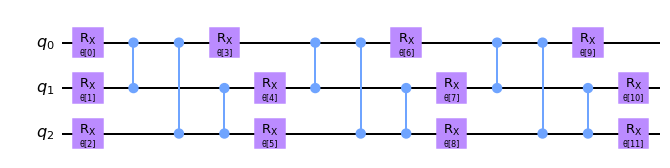

In [21]:
from qiskit.circuit.library import TwoLocal
two_local = TwoLocal(3, 'rx', 'cz')
two_local.decompose().draw('mpl')

In [30]:
# all the different tunable angles
two_local.parameters[0].index

0

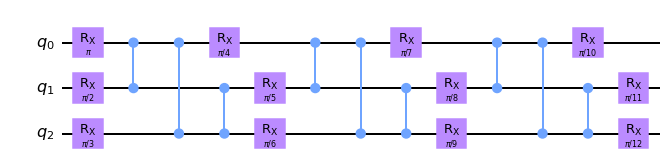

In [32]:
# now I can assign values to these params
import numpy as np
bound_circuit = two_local.assign_parameters({p: np.pi/(1+p.index) for p in two_local.parameters})
bound_circuit.decompose().draw('mpl')

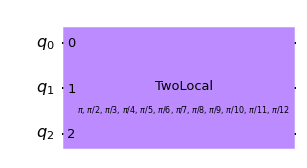

In [33]:
# if you don't decompose you get the block circuit
bound_circuit.draw('mpl')

## Data-encoding circuits

This is a parameterized circuit that is useful in quantum machine learning. There's lots of different encoding schemes to store data into these quantum states; below is a version of "angle-encoding". To be honest I don't completely understand what is going on here yet.

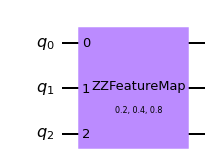

In [34]:
from qiskit.circuit.library import ZZFeatureMap
features = [0.2, 0.4, 0.8]
feature_map = ZZFeatureMap(feature_dimension=len(features))

encoded = feature_map.assign_parameters(features)
encoded.draw('mpl')

# Qiskit primitives

In [46]:
# This is just if you want to use some backend Estimator
# Not 100% sure the difference between backend versions

# from qiskit.primitives import BackendEstimator
# provider = IBMQ.get_provider('ibm-q')
# backend = provider.get_backend('ibm_osaka')
# estimator = BackendEstimator(backend)

Hm, what are observables exactly in quantum computing?

In [49]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs = [1, 1, -1, 1])

In [50]:
observable

SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j])

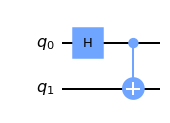

In [51]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0, 1)
qc.draw('mpl')

In [52]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [53]:
job = estimator.run(qc, observable)
result = job.result()
print(result)

EstimatorResult(values=array([4.]), metadata=[{}])


In [54]:
result.values[0]

3.999999999999999

You can make parameterized circuits in which a parameter must be provided to specify the circuit operation

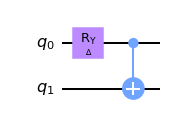

In [56]:
from qiskit.circuit import Parameter

delta = Parameter('∆')
param_qc = QuantumCircuit(2)
param_qc.ry(delta, 0)
param_qc.cx(0, 1)
param_qc.draw('mpl')

In this next case, we give it a list of circuits and list of observables (of the same size), to get a list of results.

In [59]:
import numpy as np

parameter_values = [[0], [np.pi/6], [np.pi/2]]

#Observable the same each time, but the different param values change the circuit
job = estimator.run([param_qc]*3, [observable]*3, parameter_values=parameter_values)
values = job.result().values

for i in range(3):
    print(f"Parameter: {parameter_values[i][0]:.5f}\t Expectation value: {values[i]}")

Parameter: 0.00000	 Expectation value: 2.0
Parameter: 0.52360	 Expectation value: 3.0
Parameter: 1.57080	 Expectation value: 4.0


# Notes

Aer and IBMQ are different providers. Aer gives you access to simulator backends while IBMQ gives you access to simulators and actual quantum machines (though it looks like the queue is extremely long).

Some of the documentation for Qiskit is incompatible with the Qiskit-Aer version. Keep this in mind when debugging

# Quantum Games

## Open Source contributions

Here are some steps to contributing to Qiskit (or any open source repo!)

- Fork the repo onto your own personl github (this is why people have a e.g. johnjeang/Qiskit page!)
- Clone YOUR OWN fork onto your local computer (you'll be on the master branch of this)
- `git remote -v` should show that the remote of your local repo is pointing to your own github
- add an upstream to the ORIGINAL qiskit repo with `git remote add upstream <insert clone address>` (Now you will have both an "origin" remote and an "upstream" remote)
- create branch with `git branch <insert branch name>`
- git checkout <insert name> (can confirm with "git status")
- Good to do this in a new environment - install qiskit from source (matybe even newest version). Can create environment after cloning (so you don't have to do the clone step all over again). Review Qiskit video to do this correctly.
- Can cnofirm installation by importing qiskit 
- qiskit.__qiskit_version__ in terminal to confirm version
- create kernal for new envrionment! (link in description of video by Abe)
- Find and fix the code that is causing the issue (save, debug manually)
- Run tests (`make lint`, `make style`, `make test`)
- add, and commit (just the file you changed)
- `git push --set-upstream origin <branch_name>` (otherwise there will be an error that the branch has no upsteam set yet)
- Submit pull request on Github
- Sign contributor license agreement




In [ ]:
#help(circuit_all.draw()

# Helpfull for finding out where code lives

## Ecosystem

Open source software live in github (several repos). The ecosystem is split into 4 components

- Qiskit Terra (foundational layer)
- Qiskit Ignis
- Qiskit Aer
- Qiskit Aqua

Qiskit Terra does not seem to be the name of any repo anymore; some of this is deprecated.

Ignis and Aqua are deprecated, and Aer got moved to its own package called qiskit-aer (`pip install qiskit-aer`)

Python 3.7 support is deprecated, needs python 3.8 or later

`pip install qiskit-ibm-provider` is not part of the meta package, so you need to install it separately

qiskit-experiments replaced qiskit-ignis, while "aqua" was replaced by "applications" module (now it is not installed with the meta package?)

qiskit-terra was renamed to just qiskit. Previously "qiskit" was a metapackage with multiple things including qiskit-terra, but now since it is just qiskit-terra you have to install the other stuff separately (like the ibm_runtime and aer)

## Qiskit Runtime 

The main principle of `Qiskit Rnutime` is to be a layer of abstraction for software developers who don't want to deal with the nitty gritty of the code's interaction with hardware.

Part of the advantage comes from "containerization" with facillitates the way your local machine interacts with a cloud service.

"Qiskit Runtime" specializes in "Primitives" which is `estimator` and `sampler`. They have built in interactions with hardware so you don't have to code it up. `Estimator` deals with expected values so you don't have to interpret count distributions. `Sampler` is a deeper dive into the distribution and returns "quasiprobabilities"